# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('salary_dataset.csv')

data

,age,experience,gpa,degree,position,salary
0,30.0,7.0,3.94,bachelor,engineer,32500.0
1,26.0,2.0,2.86,bachelor,NaN,22500.0
2,27.0,0.0,3.13,doctorate,secretary,37000.0
3,32.0,NaN,3.10,bachelor,engineer,24500.0
4,24.0,1.0,3.81,bachelor,accountant,23500.0
...,...,...,...,...,...,...
85,31.0,1.0,2.79,master,engineer,34000.0
86,NaN,5.0,3.27,doctorate,secretary,36000.0
87,28.0,7.0,2.64,doctorate,secretary,38000.0
88,26.0,1.0,2.52,bachelor,secretary,NaN


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         89 non-null     float64
 1   experience  89 non-null     float64
 2   gpa         90 non-null     float64
 3   degree      90 non-null     object 
 4   position    89 non-null     object 
 5   salary      89 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.3+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,age,experience,gpa,salary
count,86.000000,86.000000,86.000000,86.000000
mean,28.023256,3.848837,3.278605,31348.837209
std,4.408486,3.702201,0.528937,9255.227384
min,21.000000,0.000000,2.540000,13000.000000
25%,24.000000,1.000000,2.820000,24500.000000
50%,28.000000,3.000000,3.260000,30500.000000
75%,32.000000,7.000000,3.640000,37375.000000
max,35.000000,13.000000,5.880000,54000.000000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'salary'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [10]:
numerical_feature = ['age', 'experience', 'gpa']
categorical_feature = ['degree', 'position']

In [11]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

degree : ['bachelor' 'doctorate' 'master']
position : ['accountant' 'engineer' 'secretary']


In [12]:
ordinal_feature = ['degree']
nominal_feature = ['position']

## 5.1. Ordinal Encoding

### 5.1.1. Training Set

In [13]:
categories = [
    np.array(['bachelor', 'master', 'doctorate'], dtype=object),
]

In [14]:
ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

### 5.1.2. Test Set

In [15]:
X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [16]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [18]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [19]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [21]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [22]:
reg = MLPRegressor(
    hidden_layer_sizes=(10, 10),
    activation='relu',
    learning_rate_init=0.0000001,
    max_iter=1000,
    alpha=0,
    solver='sgd',
    momentum=0
)

## 6.2. Train Model

In [23]:
reg.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0, hidden_layer_sizes=(10, 10), learning_rate_init=1e-07,
             max_iter=1000, momentum=0, solver='sgd')

## 6.3. Model's Weight & Bias

In [24]:
reg.coefs_

[array([[ 3.50634029e-01, -6.70078966e-02, -2.19223534e-01,
          3.57701088e+00, -5.43523706e-01, -4.22988599e-01,
          2.48310207e+00,  3.55985827e-01,  2.26744488e+00,
          3.44940806e+00],
        [ 3.53399648e-02,  7.78915108e-01, -5.44807842e-03,
          8.04575564e+00,  1.36317931e-01,  8.83445172e-03,
          5.06183133e+00, -3.03015518e-01,  5.75520415e+00,
          7.01838506e+00],
        [ 4.66244505e-01,  6.02928721e-01,  3.94857726e-02,
          3.02267948e+00,  1.92455219e-01, -2.02167236e-01,
          2.16615602e+00, -3.24877254e-01,  1.99603840e+00,
          3.00671601e+00],
        [-2.88886962e-01,  6.51423683e-01,  3.34872379e-01,
          9.90392793e+00,  3.16007925e-01, -4.76523756e-01,
          6.69165701e+00, -1.94795494e-01,  6.59416608e+00,
          8.53832408e+00],
        [-5.43671335e-01, -5.09241833e-01, -2.44168813e-01,
          3.11498510e+00, -5.27344661e-01, -4.24244534e-01,
          1.93568096e+00,  2.24971023e-01,  2.282072

In [25]:
reg.intercepts_

[array([-0.25364816, -0.05903221, -0.55872919, 10.0701345 , -0.04172889,
         0.26427783,  6.29492725, -0.57614842,  6.83699534,  8.64208466]),
 array([ 2.63879463,  0.10639705,  0.27059792, -0.20765021,  0.8706175 ,
        -0.33292573,  0.43679555,  0.40174286,  0.56354428,  0.29275768]),
 array([0.55652555])]

# 7. Prediction

## 7.1. Training Set

In [26]:
y_pred_train = reg.predict(X_train_scaled)

In [27]:
y_pred_train

array([38345.18605332, 23508.32892645, 50550.52826666, 27006.52202155,
       23132.25799518, 33896.69758423, 30924.74376379, 18583.84356568,
       36910.63438316, 33196.68922343, 24830.37876458, 22043.21858802,
       17322.28300412, 21854.51719721, 39629.08176874, 40112.80049693,
       23363.04185564, 36060.15462794, 34585.6591369 , 38001.0403995 ,
       43967.64884395, 17146.60361529, 17756.37567296, 22379.39031825,
       44490.89522631, 24838.34157334, 35949.08805392, 40089.33160004,
       26613.11621146, 29375.21364627, 46003.29452266, 24250.24664807,
       51430.12456262, 31712.66124148, 19792.53169194, 30853.54558015,
       20527.85800694, 31312.38378278, 36544.15533958, 31648.3015917 ,
       44030.22001722, 30295.40109887, 30239.25367838, 43442.24391532,
       33751.48783044, 33241.11948647, 33785.52812076, 40725.36539943,
       33165.88035224, 46082.17778208, 34632.76912587, 26278.64693197,
       31089.92954418, 30552.70990297, 48884.4526736 , 31665.29730208,
      

## 7.2. Test Set

In [28]:
y_pred_test = reg.predict(X_test_scaled)

In [29]:
y_pred_test

array([31766.64214584, 23803.47864997, 26501.91944231, 28914.30706226,
       27457.44810598, 27012.78142475, 28795.63232391, 46513.23519976,
       31744.12095747, 22215.91925635, 21516.01644056, 35728.2088076 ,
       34205.7041937 , 29928.90163887, 42613.39729592, 22597.19404606,
       17424.04927176, 30668.45972314])

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [30]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.8692561687485486
mean_squared_error =		 11805370.605595747
mean_absolute_error =		 2845.3476420727425
mean_absolute_percentage_error = 0.10006485650446513


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

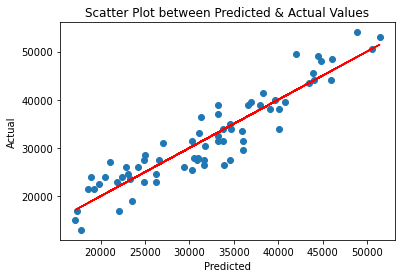

In [31]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [32]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.8613668684936288
mean_squared_error =		 7774580.245280142
mean_absolute_error =		 2212.309667557556
mean_absolute_percentage_error = 0.08147561770486715


### 8.2.2 Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

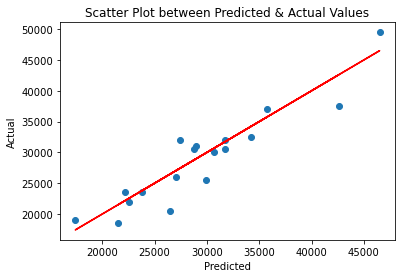

In [33]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [34]:
import pickle

In [35]:
pickle.dump((reg, 
             ordinal_encoder, 
             one_hot_encoder, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature),  open('deep_learning_regrssion_model.pickle', 'wb'))